# **Binary Logistic Regression - A full project**
This project demonstrates the complete process of building and evaluating a binary logistic regression model.

* Data Preparation

* Model Estimation

* Assumption Checking

* Goodness of Fit Assessment

* Classification Performance Evaluation

* Model Interpretation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
# Setting logging to print only error messages from sklearn
import logging
logging.basicConfig()
logging.getLogger("SKLEARNEX").setLevel(logging.ERROR)

# Import warnings module
import warnings
warnings.filterwarnings("ignore") # Ignore warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Business Analytics/Teaching materials/MIS 315/Q251/Week 7 - Logistic Regression I/Purchasing Behaviour.xlsx'

In [ ]:
df = pd.read_excel(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Spender              75 non-null     int64 
 1   Gender               75 non-null     object
 2   Age                  75 non-null     int64 
 3   Store Type           75 non-null     object
 4   Value Products       75 non-null     int64 
 5   Brand Products       75 non-null     int64 
 6   Top Fresco Products  75 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 4.2+ KB


No missing values are found.

In [ ]:
df.describe()

,Spender,Age,Value Products,Brand Products,Top Fresco Products
count,75.000000,75.000000,75.000000,75.00000,75.000000
mean,0.573333,38.640000,15.813333,8.60000,6.893333
std,0.497924,13.808184,12.213963,6.17974,5.326054
min,0.000000,19.000000,0.000000,0.00000,0.000000
25%,0.000000,25.500000,7.000000,3.00000,3.000000
50%,1.000000,38.000000,13.000000,8.00000,6.000000
75%,1.000000,48.500000,20.000000,13.00000,10.000000
max,1.000000,68.000000,48.000000,23.00000,20.000000


In [ ]:
cols_cont = ['Value Products', 'Brand Products', 'Top Fresco Products']

df = df[(df[cols_cont] > 0).all(axis=1)]

In [ ]:
df.head()


,Spender,Gender,Age,Store Type,Value Products,Brand Products,Top Fresco Products
0,0,Male,26,Convenient Stores,8,2,1
1,0,Female,33,Superstore,6,5,1
2,1,Male,56,Online,35,8,12
4,1,Female,55,Online,38,18,20
6,1,Male,39,Online,40,9,15


In [ ]:
df['Male'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [ ]:
df.head()

,Spender,Gender,Age,Store Type,Value Products,Brand Products,Top Fresco Products,Male
0,0,Male,26,Convenient Stores,8,2,1,1
1,0,Female,33,Superstore,6,5,1,0
2,1,Male,56,Online,35,8,12,1
4,1,Female,55,Online,38,18,20,0
6,1,Male,39,Online,40,9,15,1


In [ ]:
df.shape

(69, 8)

In [ ]:
X1 = df.drop(['Gender', 'Store Type','Spender'], axis=1)
y = df['Spender']

In [ ]:
X1.head()

,Age,Value Products,Brand Products,Top Fresco Products,Male
0,26,8,2,1,1
1,33,6,5,1,0
2,56,35,8,12,1
4,55,38,18,20,0
6,39,40,9,15,1


<Axes: >

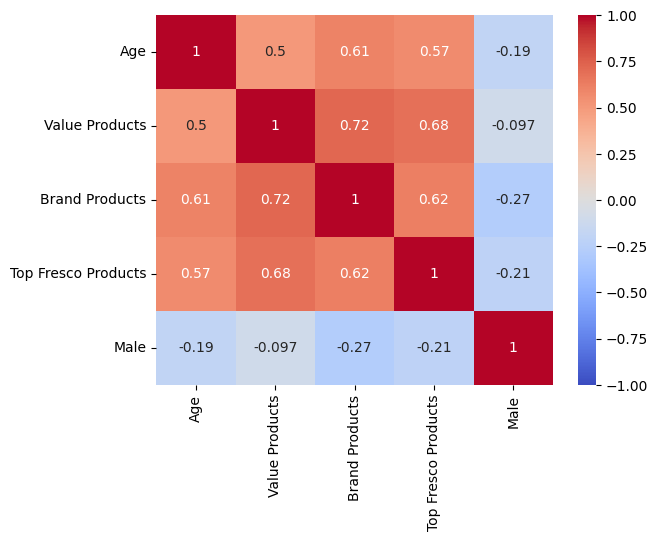

In [ ]:
# Compute correlation matrix for chosen columns
correlation_matrix = X1.corr()

# Display correlation matrix in a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# **Model Development**

In [ ]:
# Add constant
X1_const = sm.add_constant(X1)

# Fit logistic regression
log_reg1 = sm.Logit(y, X1_const).fit()

# Print summary
print(log_reg1.summary())


Optimization terminated successfully.
         Current function value: 0.137686
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                Spender   No. Observations:                   69
Model:                          Logit   Df Residuals:                       63
Method:                           MLE   Df Model:                            5
Date:                Sun, 02 Nov 2025   Pseudo R-squ.:                  0.7922
Time:                        10:00:32   Log-Likelihood:                -9.5003
converged:                       True   LL-Null:                       -45.711
Covariance Type:            nonrobust   LLR p-value:                 3.208e-14
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -13.5328      4.840     -2.796      0.005     -23.020      -4.046
A

In [ ]:
X2 = df.drop(['Gender', 'Store Type','Spender','Top Fresco Products'], axis=1)

In [ ]:
# Add constant
X2_const = sm.add_constant(X2)

# Fit logistic regression
log_reg2 = sm.Logit(y, X2_const).fit()

# Print summary
print(log_reg2.summary())

Optimization terminated successfully.
         Current function value: 0.138650
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                Spender   No. Observations:                   69
Model:                          Logit   Df Residuals:                       64
Method:                           MLE   Df Model:                            4
Date:                Sun, 02 Nov 2025   Pseudo R-squ.:                  0.7907
Time:                        10:00:32   Log-Likelihood:                -9.5669
converged:                       True   LL-Null:                       -45.711
Covariance Type:            nonrobust   LLR p-value:                 7.458e-15
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -13.0430      4.424     -2.948      0.003     -21.714      -4.372
Age             

## Model 3

In [ ]:
X3 = df.drop(['Gender', 'Store Type','Spender','Top Fresco Products','Male'], axis=1)

In [ ]:
# Add constant
X3_const = sm.add_constant(X3)

# Fit logistic regression
log_reg3 = sm.Logit(y, X3_const).fit()

# Print summary
print(log_reg3.summary())

Optimization terminated successfully.
         Current function value: 0.140028
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                Spender   No. Observations:                   69
Model:                          Logit   Df Residuals:                       65
Method:                           MLE   Df Model:                            3
Date:                Sun, 02 Nov 2025   Pseudo R-squ.:                  0.7886
Time:                        10:00:32   Log-Likelihood:                -9.6619
converged:                       True   LL-Null:                       -45.711
Covariance Type:            nonrobust   LLR p-value:                 1.516e-15
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -13.0649      4.493     -2.908      0.004     -21.870      -4.260
Age             

## Model 4

In [ ]:
X4 = df.drop(['Gender', 'Store Type','Spender','Top Fresco Products','Male','Age'], axis=1)

In [ ]:
# Add constant
X4_const = sm.add_constant(X4)

# Fit logistic regression
log_reg4 = sm.Logit(y, X4_const).fit()

# Print summary
print(log_reg4.summary())


Optimization terminated successfully.
         Current function value: 0.171146
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                Spender   No. Observations:                   69
Model:                          Logit   Df Residuals:                       66
Method:                           MLE   Df Model:                            2
Date:                Sun, 02 Nov 2025   Pseudo R-squ.:                  0.7417
Time:                        10:00:32   Log-Likelihood:                -11.809
converged:                       True   LL-Null:                       -45.711
Covariance Type:            nonrobust   LLR p-value:                 1.890e-15
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -9.1328      2.750     -3.322      0.001     -14.522      -3.744
Value Products  

The results indicate that both 'Value Products' and 'Brand Products' have significant values of the Wald statistics below 5%. Consequently, this model is parsimonious.

# **Model Assumptions**

# ✅ 1. Linearity of independent variables and log odds

In [ ]:
df_lt = df.copy()  # lt = logit transform

# Define continuous variables
continuous_var = ['Value Products', 'Brand Products']

# Add logit transform interaction terms (natural log) for continuous variables e.g. Brand Products * Log(Brand Products)
for var in continuous_var:
    df_lt[f'{var}:Log_{var}'] = df_lt[var].apply(lambda x: x * np.log(x)) #np.log = natural log

df_lt.head()

,Spender,Gender,Age,Store Type,Value Products,Brand Products,Top Fresco Products,Male,Value Products:Log_Value Products,Brand Products:Log_Brand Products
0,0,Male,26,Convenient Stores,8,2,1,1,16.635532,1.386294
1,0,Female,33,Superstore,6,5,1,0,10.750557,8.047190
2,1,Male,56,Online,35,8,12,1,124.437182,16.635532
4,1,Female,55,Online,38,18,20,0,138.228274,52.026692
6,1,Male,39,Online,40,9,15,1,147.555178,19.775021


In [ ]:
# Keep columns related to continuous variables
cols_to_keep = continuous_var + df_lt.columns.tolist()[-len(continuous_var):]
cols_to_keep

['Value Products',
 'Brand Products',
 'Value Products:Log_Value Products',
 'Brand Products:Log_Brand Products']

In [ ]:
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
# Redefine independent variables to include interaction terms
X_lt = df_lt[cols_to_keep]
y_lt = df_lt['Spender']

# Add constant
X_lt_constant = sm.add_constant(X_lt, prepend=False)

# Build model and fit the data (using statsmodel's Logit)
logit_results = GLM(y_lt, X_lt_constant, family=families.Binomial()).fit()

# Display summary results
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Spender   No. Observations:                   69
Model:                            GLM   Df Residuals:                       64
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11.789
Date:                Sun, 02 Nov 2025   Deviance:                       23.579
Time:                        10:00:32   Pearson chi2:                     34.4
No. Iterations:                    11   Pseudo R-squ. (CS):             0.6259
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Value 

The values of the significance are higher than 0.05. Thus, the linearity assumption for the independent variable is met.

# ❌ 2. No Severe Multicollinearity

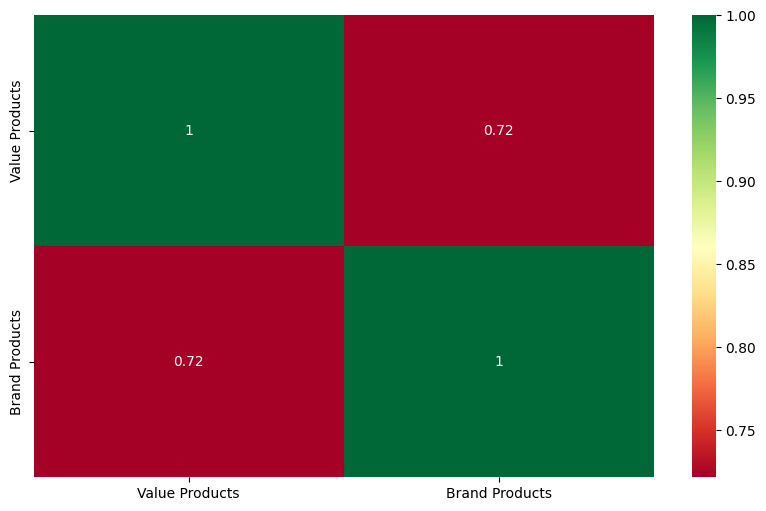

In [ ]:
corrMatrix = X4.corr()
plt.subplots(figsize=(10, 6))
sns.heatmap(corrMatrix, annot=True, cmap="RdYlGn")
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X4.columns
vif_data["VIF"] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]

print(vif_data)

          Feature      VIF
0  Value Products  5.97901
1  Brand Products  5.97901


The VIF values of two predictors are all greater than 5.0, which indicates a severe multicollinearity. Therefore, to ensure more stable coefficient estimates and reliable inference

# ✅ 3. Independence of Observations

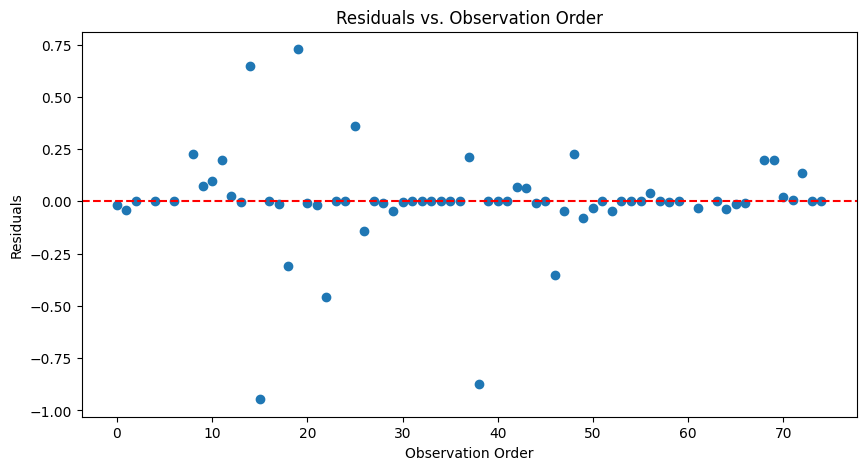

In [ ]:
import matplotlib.pyplot as plt

residuals = log_reg4.resid_response

plt.figure(figsize=(10,5))
plt.plot(residuals, marker='o', linestyle='')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Observation Order")
plt.xlabel("Observation Order")
plt.ylabel("Residuals")
plt.show()


The residuals plotted against the order of observations show no systematic pattern, indicating that the independence of observations assumption is satisfied.

# ❌ 4. No strongly influential outliers

In [ ]:
# Influence object
influence = log_reg4.get_influence()

# Hat values (leverage)
hat = influence.hat_matrix_diag

# Pearson residuals
pearson_resid = log_reg4.resid_pearson

# Standardized residuals
std_resid = pearson_resid / np.sqrt(np.clip(1 - hat, 1e-8, None))

# Cook's Distance
cooks_d, _ = influence.cooks_distance

# Append to X4
X4 = X4.copy()
X4["StdResid"] = std_resid
X4["CooksD"]   = cooks_d

In [ ]:
cook_threshold = 4 / len(X4)
cook_threshold

0.057971014492753624

In [ ]:
# check the observations with cook's distance larger than threshold or std resid>3
suspects = X4[(X4["CooksD"] > cook_threshold) | (np.abs(X4["StdResid"]) > 3)]
suspects

,Value Products,Brand Products,StdResid,CooksD
14,13,4,1.463261,0.118786
15,15,8,-4.302208,0.307210
19,8,7,1.719198,0.104687
22,7,9,-1.012736,0.070468
38,13,8,-2.735165,0.155812


In [ ]:
extreme_pro = len(suspects)/len(X4)*100
extreme_pro

7.246376811594203

- The most concerning case is Observation 15, which is both a strong outlier and highly influential.

- Observations 38, 14, and 19 are somewhat influential but less critical.

- Observation 22 does not pose a problem.

--> Remove obs 15

# ✅ 5. Sufficiently large sample size

In [ ]:
df['Spender'].value_counts()*100/len(df)

,count
Spender,
1,62.318841
0,37.681159


In [ ]:
len(X4)

69

- The less frequent class counts 37.68%.

- The sample size should be > 10*2/37.68% = 53 samples.

- In this case, this assumption is met.

# Rebuild the model

In [ ]:
df_copy = df.drop(index=15).copy()

X5 = df_copy.drop(columns=['Gender','Store Type','Spender','Top Fresco Products','Male','Age','Value Products'])
y  = df_copy['Spender']

In [ ]:
# Add constant
X5_const = sm.add_constant(X5)

# Fit logistic regression
log_reg5 = sm.Logit(y, X5_const).fit()

# Print summary
print(log_reg5.summary())

Optimization terminated successfully.
         Current function value: 0.264514
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                Spender   No. Observations:                   68
Model:                          Logit   Df Residuals:                       66
Method:                           MLE   Df Model:                            1
Date:                Sun, 02 Nov 2025   Pseudo R-squ.:                  0.5978
Time:                        10:00:33   Log-Likelihood:                -17.987
converged:                       True   LL-Null:                       -44.723
Covariance Type:            nonrobust   LLR p-value:                 2.623e-13
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.4240      1.197     -3.694      0.000      -6.771      -2.077
Brand Products   

# **Goodness of Fit**

**Pseudo R² (McFadden’s)**

---



In [ ]:
print("McFadden's Pseudo R²:", log_reg5.prsquared)

McFadden's Pseudo R²: 0.5978137307813634


A McFadden’s Pseudo R² of 0.60 indicates an excellent model fit. This suggests that the fitted logistic regression model provides a substantial improvement over the null model and explains the observed outcomes very well.

**Hosmer–Lemeshow test**

---



Null hypothesis (H0): The model fits the data well (no difference between observed and expected).

Alternative hypothesis (H1): The model does not fit well.

p-value > 0.05 → Fail to reject H0 → No evidence of poor fit

p-value < 0.05 → Reject H0 → There is evidence of lack of fit (the predicted probabilities do not match observed outcomes).

In [ ]:
from scipy.stats import chi2

# True labels
y_true = y
# Predicted probabilities from the fitted model
y_pred = log_reg5.predict(X5_const)

# Safety clip to avoid 0/1 probs (prevents division by zero in HL stat)
y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)

# Bin by predicted probability
hl_df = pd.DataFrame({'y': y_true, 'p': y_pred})
hl_df['bin'] = pd.qcut(hl_df['p'], 10, duplicates='drop')

# Observed vs expected in each bin
hl_tab = hl_df.groupby('bin').apply(lambda g: pd.Series({
    'observed_1': g['y'].sum(),
    'observed_0': len(g) - g['y'].sum(),
    'expected_1': g['p'].sum(),
    'expected_0': len(g) - g['p'].sum()
}))

# Hosmer–Lemeshow Chi-square, df, p-value
hl_stat = (
    ((hl_tab['observed_1'] - hl_tab['expected_1'])**2 / hl_tab['expected_1']) +
    ((hl_tab['observed_0'] - hl_tab['expected_0'])**2 / hl_tab['expected_0'])
).sum()

hl_dfree = hl_tab.shape[0] - 2
hl_pval  = chi2.sf(hl_stat, hl_dfree)

print(f"Hosmer–Lemeshow χ² = {hl_stat:.3f}, df = {hl_dfree}, p-value = {hl_pval:.4f}")
hl_tab


Hosmer–Lemeshow χ² = 2.855, df = 8, p-value = 0.9431


,observed_1,observed_0,expected_1,expected_0
bin,,,,
"(0.02429, 0.04956]",0.0,9.0,0.345372,8.654628
"(0.04956, 0.1328]",0.0,5.0,0.490492,4.509508
"(0.1328, 0.3212]",4.0,6.0,2.530663,7.469337
"(0.3212, 0.6378]",1.0,2.0,1.490224,1.509776
"(0.6378, 0.8111]",6.0,2.0,5.936779,2.063221
"(0.8111, 0.9095]",5.0,1.0,5.397424,0.602576
"(0.9095, 0.9935]",6.0,0.0,5.836913,0.163087
"(0.9935, 0.9986]",8.0,0.0,7.974174,0.025826
"(0.9986, 0.9999]",6.0,0.0,5.998279,0.001721


The p-value is larger than the significance level, thus, we fail to reject the null hypothesis. The model fits the data well.

**Likelihood Ratio Test**

---



**Null**: The fitted model is not an improvement over the null (intercept-only) model.
- B1=B2=...Bn=0

**ALternative**:  The fitted model is a significant improvement over the null model.
- At least one B is different from 0

In [ ]:
# Log-likelihoods
ll_null = log_reg5.llnull   # null model
ll_model = log_reg5.llf     # fitted model

# LRT statistic
lrt_stat = -2 * (ll_null - ll_model)

# Degrees of freedom = difference in number of parameters
df = log_reg5.df_model

# p-value
p_value = chi2.sf(lrt_stat, df)

print(f"Likelihood Ratio Test: χ² = {lrt_stat:.3f}, df = {df}, p-value = {p_value:.4f}")


Likelihood Ratio Test: χ² = 53.472, df = 1.0, p-value = 0.0000


p-value < significance level --> reject H0. The fitted model fits significantly better than the intercept-only model.

# **Classification Performance**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Predict probabilities
y_pred_prob = log_reg5.predict(X5_const)

# Convert to binary class (threshold = 0.5)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy
acc = accuracy_score(y, y_pred)
print("Accuracy:", acc)

# Precision, Recall, F1
print("\nClassification Report:\n", classification_report(y, y_pred))


Confusion Matrix:
 [[22  3]
 [ 5 38]]
Accuracy: 0.8823529411764706

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.85        25
           1       0.93      0.88      0.90        43

    accuracy                           0.88        68
   macro avg       0.87      0.88      0.88        68
weighted avg       0.89      0.88      0.88        68



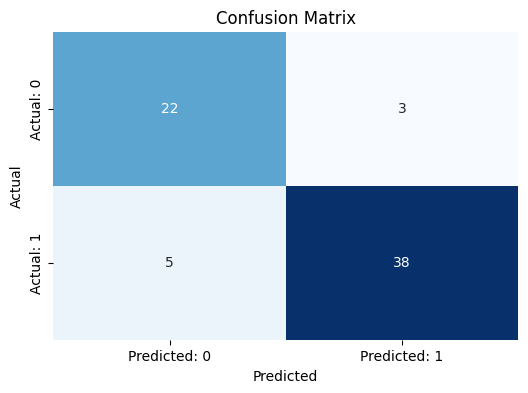

In [ ]:
# Confusion matrix values (from your model)
cm = np.array([[22, 3],
               [5, 38]])

# Plot confusion matrix heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted: 0", "Predicted: 1"],
            yticklabels=["Actual: 0", "Actual: 1"])

plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

The accuracy of the model is 88%, which indicates a high classification ability.

# **Model Interpretation**

In [ ]:
odds_ratio = np.exp(log_reg5.params)
print("\nOdds Ratios:\n", odds_ratio)


Odds Ratios:
 const             0.011986
Brand Products    2.085828
dtype: float64


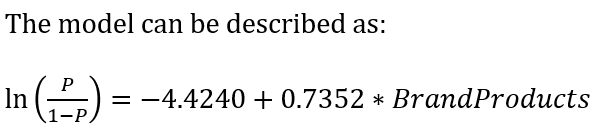

- Where p is the probability that the customer is a high spender

- The Exp(B) value for Brand Products is greater than 1, indicating a positive relationship. Customers who purchase more Brand Products are substantially more likely to be classified as Spenders. Specifically, each additional unit of Brand Products purchased increases the odds of being a Spender by about 2.09 times.
- When Brand Products = 8, the probability of that customer being a high spender is 81%, the odds = 4.3
- When Brand Products = 9, the probability of that customer being a high spender is 90%, the odds = 8.9, which is twice as the odds when Brand Products is 8.


# **Citing This Notebook**
If you use this notebook in your work, please cite it as follows:

Linh, H. (2025). Principles of Data Analytics. Lecture examples and exercises. (Version 1.0.0). URL: https://github.com/MsLinhEIU/MIS-315---Principles-of-Data-Analytics/tree/main